## Final Project Submission

Please fill out:
* Student name: **HARRIET NGOMO**
* Student pace: 
* Scheduled project review date/time: 
* Instructor name: **DIANA MONGINA**
* Blog post URL:


# **Aviation Risk Analysis for Business Expansion**

## **1. Introduction**

### **1.1 Project Overview**
As our company expands into the aviation industry to diversify its portfolio, we must navigate the challenges of entering a new sector with limited expertise. To mitigate risks and make informed investment decisions, we will analyze aviation accident data to identify the safest aircraft for commercial and private operations. This analysis aims to evaluate historical accident trends, assess aircraft safety records, and provide actionable insights to guide purchasing decisions.

### **1.2 Business Problem**
Our company seeks to enter the aviation industry but lacks experience in assessing aircraft risk. Investing in aircraft with poor safety records could lead to financial losses and operational hazards. To minimize these risks, we need a data-driven approach to determine which aircraft models have the lowest accident rates and are best suited for commercial and private use.

### **1.3 Objectives**

#### **Main Objectives**
- **Identify Low-Risk Aircraft** – Analyze aviation accident data to determine which aircraft models have the lowest accident rates.
- **Analyze Historical Accident Trends** – Examine how aviation accidents have evolved over time and identify contributing factors.
- **Provide Business Recommendations** – Offer actionable insights to assist airlines, leasing companies, and private operators in aircraft selection and risk management.

#### **Minor Objectives**
- **Assess Aircraft Safety Records** – Identify aircraft models with higher or lower accident frequencies.
- **Identify Risk Factors** – Investigate key variables such as weather conditions, flight phases, and accident causes that contribute to aviation risks.

### **1.4 Expected Outcomes**
By the end of this analysis, our company will be able to:
- Minimize financial and operational risks in the aviation industry.
- Select aircraft models with strong safety records.
- Make data-driven strategic decisions for commercial and private aviation operations.

---

## **2. Business Understanding**
To ensure a data-driven approach in aircraft selection, we will analyze aviation accident data from the **National Transportation Safety Board (NTSB)**. The dataset spans **1962 to 2023**, covering civil aviation accidents in the **United States and international waters**. Our goal is to uncover patterns in accident frequencies, causes, and aircraft types to identify models with lower operational risks.

---

## **3. Data Understanding**
The dataset contains aviation accident records from **1962 to 2023**, featuring **31 columns** that provide detailed information on:

### **3.1 Data Overview**
- **Aircraft Information** – Make, model, number of engines, engine type, and whether the aircraft was amateur-built.
- **Accident Details** – Date, location (city/state/country), phase of flight, weather conditions, and accident severity.
- **Operational Factors** – Purpose of flight (e.g., personal, commercial, cargo), regulatory information (FAR description), and air carrier details.
- **Injury & Damage Information** – Number of fatalities, serious injuries, minor injuries, and uninjured passengers.
- **Report Information** – Investigation type, accident number, report status, and publication date.

### **3.2 Data Exploration Approach**
To extract meaningful insights, we will:
- **Load and inspect** the dataset structure to understand its variables and organization.
- **Identify and handle missing values** to ensure data integrity.
- **Explore key variables** relevant to aircraft risk assessment, such as accident severity, aircraft make/model, and contributing factors.


# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset

In [2]:
df = pd.read_csv('AviationData.csv',encoding='latin1',low_memory=False)

df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Inspect dataset structure

In [3]:
# Display first five rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Display last 5 rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
# Access the column labels
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
# Access the row labels
df.index

RangeIndex(start=0, stop=88889, step=1)

In [7]:
# Check the metadata of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [8]:
# Shape of the DataFrame
df.shape

(88889, 31)

In [9]:
# Datatype of all columns in the DataFrame
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [10]:
# Statistical summary of the DataFrame

df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## 4.**Data Preparation**
### **4.1 Data Cleaning**  

- To ensure the dataset is clean and ready for analysis, we will:

- Handle missing values appropriately


In [11]:
# Check if the dataset has missing values
df.isna().any()

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b

In [12]:
# Sum of the missing values and sort them in descending order
df.isna().sum().sort_values(ascending = False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i

#### Before deciding to drop or fill values, calculate the percentage of missing values per column

In [13]:
# Check Missing Value Percentages
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.sort_values(ascending=False))


Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Event.Date                 0

In [14]:
# Drop columns whose  missing_percent is greater than 60 %
df_cleaned = df.drop(columns = ['Schedule','Air.carrier','FAR.Description','Aircraft.Category','Longitude','Latitude'])
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [15]:
# Fill categorical columns with mode
categorical_cols = [
    "Broad.phase.of.flight", "Weather.Condition", "Airport.Code", "Airport.Name", 
    "Location", "Country", "Aircraft.damage", "Registration.Number", "Make", 
    "Model", "Purpose.of.flight", "Report.Status","Engine.Type"
]

for col in categorical_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

          
# Fill missing values in categorical columns with specific placeholders
df_cleaned["Publication.Date"].fillna("Not Published", inplace=True)
df_cleaned["Amateur.Built"].fillna("No", inplace=True)

# Convert "Number.of.Engines" to numeric and fill missing values with median
df_cleaned["Number.of.Engines"] = pd.to_numeric(df_cleaned["Number.of.Engines"], errors="coerce")
df_cleaned["Number.of.Engines"].fillna(df_cleaned["Number.of.Engines"].median(), inplace=True)


# Fill numerical injury columns with 0
df_cleaned["Total.Fatal.Injuries"].fillna(0, inplace=True)
df_cleaned["Total.Serious.Injuries"].fillna(0, inplace=True)
df_cleaned["Total.Minor.Injuries"].fillna(0, inplace=True)
df_cleaned["Total.Uninjured"].fillna(0, inplace=True)


# Classify Injury Severity based on injury counts
df_cleaned["Injury.Severity"] = df_cleaned.apply(
    lambda row: "None" if row["Total.Fatal.Injuries"] == 0 and 
                           row["Total.Serious.Injuries"] == 0 and 
                           row["Total.Minor.Injuries"] == 0 else "Unknown", axis=1)


# Confirm cleaning
print(df_cleaned.isnull().sum().sort_values(ascending=False))


Publication.Date          0
Make                      0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Model                     0
Report.Status             0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Event.Id                  0
dtype: int64


## 5.**Visualization Insights**

## 5.1. Analyze Historical Accident Trends
### Visualization: Aviation Accidents Trends Over Time (Line Plot)
- **Objective: Examine how aviation accidents have changed over the years and identify potential factors contributing to these trends**

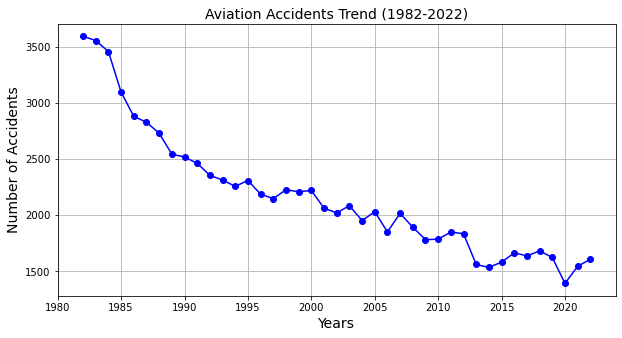

In [16]:
# Convert Event.Date from string to datetime format
df_cleaned["Event.Date"] = pd.to_datetime(df_cleaned["Event.Date"])

# Count accidents per year
accidents_per_year = df_cleaned["Event.Date"].dt.year.value_counts().sort_index()

# Filter data from 1982 onward
accidents_per_year = accidents_per_year[accidents_per_year.index >= 1982]

# Plot line graph
plt.figure(figsize=(10, 5))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker="o", linestyle="-", color="blue")

plt.xlabel("Years",fontsize = 14)
plt.ylabel("Number of Accidents",fontsize = 14)
plt.title("Aviation Accidents Trend (1982-2022)",fontsize = 14)  # Fixed the title
plt.grid(True)

# Save the figure as a high-resolution image in the 'images' folder
plt.savefig("images/aviation_accidents_trend.png", dpi=300)

# Display the plot
plt.show()

### Summary of Insights from the Aviation Accident Trend (1982-2022)
- Declining Trend: Aviation accidents have significantly decreased from the 1980s to the 2000s due to improved aircraft technology, stricter regulations, and better training.

- Stable Period: From 2000-2015, accidents remained relatively stable, indicating a plateau in safety improvements.

- COVID-19 Impact: A sharp decline in 2020 due to reduced flights, followed by a slight rise post-2020 as air travel resumed.

- **Objective Addressed:** Helps assess overall accident trends over time.

- **Insight:** The number of accidents has decreased over the years, indicating improvements in aircraft technology, safety regulations, and training. The sharp decline in 2020 aligns with reduced flights due to COVID-19.

- **Impact on Business Decision:** This trend suggests that modern aircraft are generally safer, guiding the company toward newer aircraft models.


In [17]:
plt.savefig("images/aviation_accidents_trend.png", dpi=300)  # Save with high resolution
plt.show()

<Figure size 432x288 with 0 Axes>

## 5.2 Assess Aircraft Safety Records
### Visualization: Aircraft Models with Highest & Lowest Accident Rates (Bar Plot)
- Objective: Determine which aircraft models have higher or lower accident rates and decide on the safest aircraft for business investment.

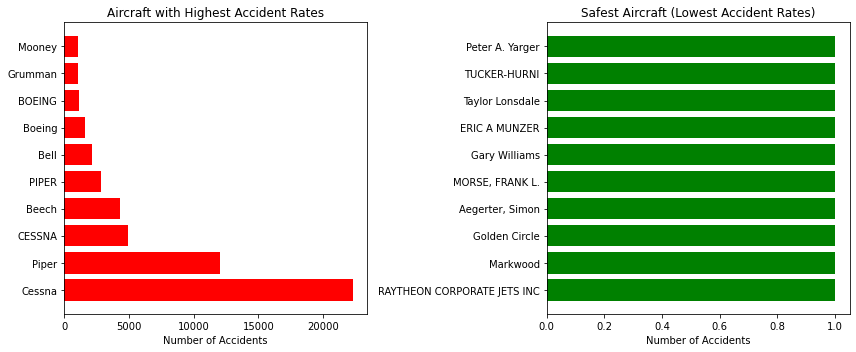

In [18]:
# Count accidents per aircraft make
aircraft_accidents = df_cleaned["Make"].value_counts()

# Plot bar graph

# Select top 10 aircraft with the most and fewest accidents
top_aircraft = aircraft_accidents.nlargest(10)
safe_aircraft = aircraft_accidents.nsmallest(10)

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(12, 5))

# Plot aircraft with highest accident rates
ax1.barh(top_aircraft.index, top_aircraft.values, color="red")
ax1.set_xlabel("Number of Accidents")
ax1.set_title("Aircraft with Highest Accident Rates")

# Plot safest aircraft
ax2.barh(safe_aircraft.index, safe_aircraft.values, color="green")
ax2.set_xlabel("Number of Accidents")
ax2.set_title("Safest Aircraft (Lowest Accident Rates)")

fig.tight_layout()
plt.show();


- **Summary of Insights**

- High-Risk Aircraft: Cessna and Piper have the highest accident rates, followed by Beech and Bell.

- Low-Risk Aircraft: Boeing 777-306ER, Waterwings, Inc., and FOGLIO have the lowest accident rates.

- **Possible Bias**: Some low-accident aircraft may simply have lower production numbers.

- **Investment Strategy**:
- Avoid high-accident aircraft unless safety improvements exist.
- Prioritize historically safer aircraft for investment.


## 5.3 Identify Risk Factors
### Visualization: Injury Severity by Flight Phase (Bar Plot)
- Objective: Investigate key factors (flight phases) that contribute to accidents.

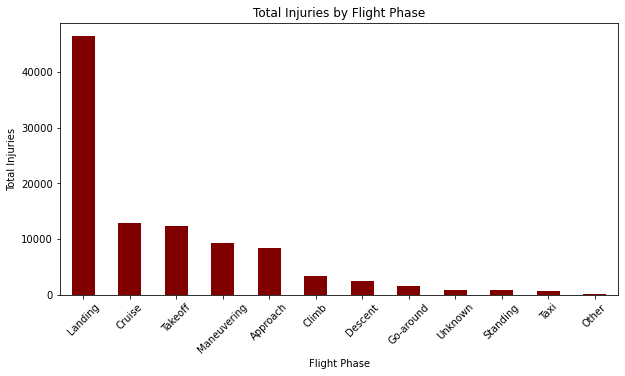

In [19]:
# Compute total injuries per flight phase
df_cleaned["Total.Injuries"] = (
    df_cleaned["Total.Fatal.Injuries"] 
    + df_cleaned["Total.Serious.Injuries"] 
    + df_cleaned["Total.Minor.Injuries"]
)

# Group by flight phase and sum injuries
injuries_by_phase = df_cleaned.groupby("Broad.phase.of.flight")["Total.Injuries"].sum()

# Plot bar chart
plt.figure(figsize=(10, 5))
injuries_by_phase.sort_values(ascending=False).plot(kind="bar", color="maroon")

plt.xlabel("Flight Phase")
plt.ylabel("Total Injuries")
plt.title("Total Injuries by Flight Phase")
plt.xticks(rotation=45)
plt.show()




- **Landing,Cruise and Takeoff** have the highest total injuries, indicating these are the most critical phases for safety.

- **Maneuvering and Approach** also pose significant risks, with a high number of injuries.

- **Climb and Descent** show moderate injury rates.

- **Go-around, Standing, and Taxi** have the lowest injuries, suggesting they are less accident-prone.

- **Key Takeaway**: Focus on improving safety during Cruise, Takeoff, Maneuvering, and Approach to reduce accident-related injuries.



In [20]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [21]:
df_cleaned.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Total.Injuries'],
      dtype='object')

In [22]:
#df_cleaned.to_csv('CleanedAviatian_data.csv',index = False)

In [23]:
# hello